### 1

Так как выполняется предположение о реализуемости, то существует такой прямоугольник, который разделяет два класса точек по принципу внутри прямоугольника - класс 1, вне прямоугольника - класс 0.

Эмпирический риск алгоритма А равен 0, потому что нет ни одной точки класса 0, которая попала в прямоугольник (из-за предположения о реализуемости). Получить ошибку меньше 0 невозможно, следовательно алгоритм реализует ERM-парадигму.

### 2

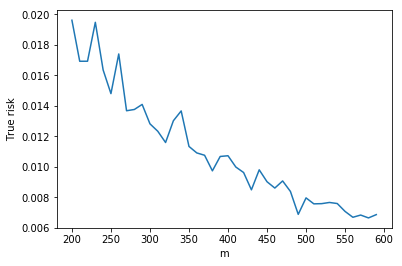

In [64]:
%matplotlib inline

import random
import math
import matplotlib.pyplot as plt


def is_in_square(coord):
    s = math.sqrt(0.5)
    return 0 <= coord[0] <= s and 0 <= coord[1] <= s

def generate_sample(m):
    result = []
    
    for _ in range(m):
        x = random.random()
        y = random.random()
        answer = is_in_square((x, y))
        result.append((x, y, answer))
        
    return result

def A(sample):
    x_min, x_max, y_min, y_max = 1, 0, 1, 0
    for entry in sample:
        if not entry[2]:
            continue
            
        if entry[0] < x_min:
            x_min = entry[0]
        elif entry[0] > x_max:
            x_max = entry[0]
        
        if entry[1] < y_min:
            y_min = entry[1]
        elif entry[1] > y_max:
            y_max = entry[1]
    
    return (x_min, x_max, y_min, y_max)

def calculate_true_risk(rect):
    rect_area = (rect[1] - rect[0]) * (rect[3] - rect[2])
    true_area = 0.5
    glob_area = 1
    
    return (true_area - rect_area) / glob_area

def average_risk(m):
    k = 50
    tmp = 0
    
    for _ in range(k):
        tmp += calculate_true_risk(A(generate_sample(m)))
    
    return tmp / k

ms = range(200, 600, 10)
true_risks = [average_risk(m) for m in ms]

plt.xlabel('m')
plt.ylabel('True risk')
plt.plot(ms, true_risks)

plt.show()




> Какой в среднем понадобился размер выборки, чтоб true risk 10%? 1%? 0.1%?:

10% - m около 40
1% - m около 400
0.1% - m около 3900

> Как ответ на предыдущий пункт должен зависить от площади X?

чем больше площадь X тем меньше ошибка (исходя из формулы true risk (Q - E) / X, где E - площадь прямоугольника, построенного алгоритмом A)

> От относительной площади Q и X?

никак, так как нет зависимости на это отношение

> От размерности пространства X?

да, так как чем больше размерность пространства, тем меньше true risk. В двумерном пространстве квадрат со стороной 1/sqrt(2) занимает половину площади квадрата со стороной 1. В трехмерном пространстве, куб со тороной 1/sqrt(2) занимает четверть объема куба со стороной 1.

> Должен ли зависеть результат от D?

